In [5]:

# Python program to read 
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd


(-0.5, 1598.5, 1199.5, -0.5)

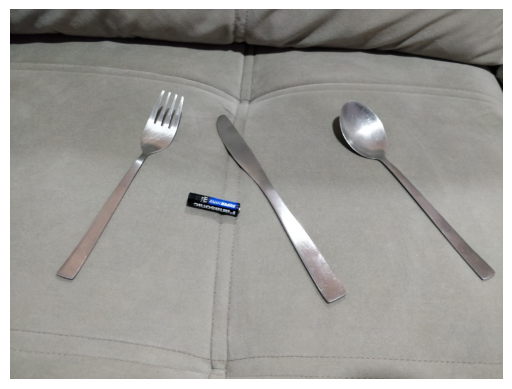

In [9]:
# Read Images
img = mpimg.imread('../data/001.jpeg')
 
# Output Images
plt.imshow(img)
plt.axis('off')

In [18]:
metadata = pd.read_csv(rf"../metadados.csv", sep=';')

In [19]:
metadata.head()

,img,classe_1,classe_2,classe_3,classe_4,classe_5,fundo,iluminacao
0,001.JPEG,garfo,pilha,faca,colher,NaN,sofa,noite-claro
1,002.JPEG,som,livro,capacete,NaN,NaN,sofa,noite-claro
2,003.JPEG,pilha,caneta,livro,capacete,NaN,chao,noite-claro
3,004.JPEG,som,livro,capacete,NaN,NaN,sofa,noite-escuro
4,005.JPEG,faca,garfo,capacete,protetor solar,NaN,bancada,noite-claro


In [36]:
metadata['classe'] = metadata['classe_1']
for i in range(2,6):

    print(i)
    metadata['classe'] = metadata['classe'] + ', ' + metadata['classe_' + str(i)]


classe_2
classe_3
classe_4
classe_5


In [60]:
metadata['classe'] = metadata['classe_1']
for i in range(2, 6):

    metadata['classe'] += ', ' + metadata.apply(lambda row: row['classe_' + str(i)] if pd.notnull(row['classe_' + str(i)]) else '', axis=1)

metadata['classe'] = metadata['classe'].str.rstrip(', ')

In [61]:
metadata['classe_2']

0     pilha
1     livro
2    caneta
3     livro
4     garfo
5     pilha
6    caneta
7     livro
8     livro
9    caneta
Name: classe_2, dtype: object

In [64]:
# Separa as palavras por vírgula e cria uma lista única de palavras
palavras_unicas = set(palavra.strip() for palavra in ','.join(metadata['classe']).split(',') if palavra)
# Converte o conjunto de volta para uma lista
lista_palavras_unicas = list(palavras_unicas)

In [65]:
lista_palavras_unicas

['garfo',
 'colher',
 'faca',
 'protetor solar',
 'livro',
 'caneca',
 'capacete',
 'pilha',
 'som',
 'caneta']

In [68]:
metadata[metadata['classe'].str.contains('garfo')].head(10)

,img,classe_1,classe_2,classe_3,classe_4,classe_5,fundo,iluminacao,classe
0,001.JPEG,garfo,pilha,faca,colher,NaN,sofa,noite-claro,"garfo, pilha, faca, colher"
4,005.JPEG,faca,garfo,capacete,protetor solar,NaN,bancada,noite-claro,"faca, garfo, capacete, protetor solar"
5,006.JPEG,garfo,pilha,faca,colher,NaN,sofa,noite-escuro,"garfo, pilha, faca, colher"
6,007.JPEG,garfo,caneta,caneca,colher,som,sofa,noite-claro,"garfo, caneta, caneca, colher, som"
9,010.JPEG,garfo,caneta,caneca,colher,som,sofa,noite-escuro,"garfo, caneta, caneca, colher, som"


In [70]:
import os

In [75]:
import os

def get_folder_size(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size / (1024 * 1024)  # Converte bytes para megabytes



In [77]:
tamanho_mb = get_folder_size("../data/")
print(f"Tamanho da pasta: {round(tamanho_mb, 2)} MB")

Tamanho da pasta: 1.29 MB


In [80]:
def get_image_resolutions(path):
    resolutions = []
    for filename in os.listdir(path):
        if filename.lower().endswith('.jpeg'):  # Exemplo para imagens PNG
            image_path = os.path.join(path, filename)
            image = plt.imread(image_path)
            resolutions.append(image.shape[:2])  # (linhas, colunas)
    return pd.DataFrame(resolutions, columns=['Linhas', 'Colunas'])

resolucoes_df = get_image_resolutions("../data/")
print(resolucoes_df)

   Linhas  Colunas
0    1200     1599
1    1200     1599
2    1599     1200
3     970     1296
4    1599     1200
5     970     1296
6    1200     1599
7     970     1296
8    1200     1599
9     970     1296


In [78]:
print(
    f'''
#############################################
    
Tabela Global sumária:
    > Nome das classes: {lista_palavras_unicas}
    > Número das classes: {len(lista_palavras_unicas)}
    > Número de imagens: {len(metadata)}
    > Tamanho da base: {round(tamanho_mb, 2)} MB
    > Resolução das imagens: {round(tamanho_mb, 2)} MB
    
#############################################
'''
)


#############################################
    
Tabela Global sumária:
    > Nome das classes: ['garfo', 'colher', 'faca', 'protetor solar', 'livro', 'caneca', 'capacete', 'pilha', 'som', 'caneta']
    > Número das classes: 10
    > Número de imagens: 10
    > Tamanho da base: 1.29 MB
    > Resolução das imagens: 1.29 MB
    
#############################################



In [ ]:
print(
    f'''
-----------------------------------------------------------
    
    
-------------------------------------------------------------------
    ''')